In [1]:
%gui qt

This notebook is an example of how to analyze the thickness of a layer of tissue.

## Generate mock data
First, we generate a set of mock data simulating a slab of tissue with three layers.

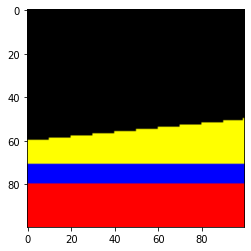

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from skimage import draw
from skimage.color import label2rgb

# image size
im_width = 100
im_height = 100

# create the empty image
mock_image_profile = np.zeros((im_height, im_width), dtype=np.uint)

# add layer 1
rr_1, cc_1 = draw.rectangle((80, 0), extent=(20, im_width), shape=mock_image_profile.shape)
mock_image_profile[rr_1, cc_1] = 1

# add layer 2
rr_2, cc_2 = draw.rectangle((70, 0), extent=(10, im_width), shape=mock_image_profile.shape)
mock_image_profile[rr_2, cc_2] = 2

# add layer 3
r_3 = np.array([70, 60, 50, 70])
c_3 = np.array([0, 0, 99, 99])
rr_3, cc_3 = draw.polygon(r_3, c_3)
mock_image_profile[rr_3, cc_3] = 3


plt.imshow(label2rgb(mock_image_profile, bg_label=0));

In [3]:
import napari
mock_image = np.tile(mock_image_profile, (100, 1, 1))

colors = {
    0: [0, 0, 0, 0],
    1: [0.5, 0.79, 0.5, 1],
    2: [0.75, 0.68, 0.83, 1],
    3: [0.99, 0.75, 0.52, 1]
}
viewer = napari.view_labels(mock_image, color=colors, opacity=0.4)

In [4]:
grad_im = np.gradient(mock_image, axis=None)
edge_im = np.sqrt(grad_im[0]**2 + grad_im[1]**2 + grad_im[2]**2)

In [5]:
edge_labels = mock_image.copy()
edge_labels[edge_im == 0] = 0

viewer.add_labels(edge_labels, color=colors);

In [6]:
from skimage.segmentation import find_boundaries
# find an interface

def find_interface(label_im, interface_label, neighbor_label, background_label=0):
    
    interface_im = np.zeros_like(label_im)
    
    # make image of just the labels of interest
    interface_im[label_im == interface_label] = interface_label
    interface_im[label_im == neighbor_label] = neighbor_label
    
    # find boundaries
    boundary_im = find_boundaries(interface_im, mode='inner', background=background_label)
    
    
    # mask out the neighbor label
    boundary_im[interface_im == neighbor_label] = background_label
    
    
    return interface_im


In [7]:
interface_mask = find_interface(edge_labels, 3, 2)
interface_im = edge_labels * interface_mask
viewer.add_labels(interface_im)

<Labels layer 'interface_im' at 0x7f1d5a78e790>

In [9]:
viewer.add_labels(interface_mask)

<Labels layer 'interface_mask' at 0x7f1daca0a710>